In [124]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import os
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [107]:
#Get vocabulary & counts for hashtag appearances
#hashtag_counts: a dictionary with key: a hashtag, value: count of that hashtag in the file

my_dir = './data'
for item in os.listdir(my_dir):
    filepath = os.path.join(my_dir, item)
    if os.path.isfile(filepath) and 'new' in filepath:
        print(filepath)
        df = pd.read_csv(os.path.join(my_dir, item))
        df['Hashtags'] = df['Text'].apply(lambda x: re.findall(r"#(\w+)", x))
        
        #ignore case of hashtags
        df['Hashtags_lower']=df['Hashtags'].apply(lambda x: [y.lower() for y in x])
        
        #Remove tweets that do not contain #capitolriots
        to_drop=[]
        for i,row in df.iterrows():
            if 'capitolriots' not in row['Hashtags_lower']:
                to_drop.append(i)
        df.drop(to_drop, axis=0, inplace=True)
        
        #ignore duplicate hashtags
        df['Hashtags_lower_uniques']=df['Hashtags_lower'].apply(lambda x: list(set(x)))
        
        tweet_hashtags = chain.from_iterable(df['Hashtags_lower_uniques'].tolist())

print(len(df.index))

./data/scraped_tweets_#capitolriots_10000_new
9995


In [108]:
# #Create vocabulary of hashtags

# hashtags=set()
# for i,row in df.iterrows():
#     hashtags.update(set(row['Hashtags_lower_uniques']))
# print(len(hashtags))

In [109]:
#Create bag of words

bow_converter = CountVectorizer(tokenizer=lambda doc: doc, binary=True, min_df=5, lowercase=False)
bow = bow_converter.fit_transform(df['Hashtags_lower_uniques'])

vocabulary = bow_converter.get_feature_names()
print(len(vocabulary))

624


In [110]:
#Average number of hashtags in each tweet
print(bow.nnz/bow.shape[0])

2.8042021010505254


In [111]:
#K-Means Clustering

true_k = 10
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
predictions = kmeans.fit_predict(bow)

In [112]:
#Number of tweets in each cluster
cluster_counts=[0 for _ in range(true_k)]
for asn in predictions:
    cluster_counts[asn]+=1
print(cluster_counts)

[264, 52, 332, 876, 7482, 377, 192, 6, 167, 247]


In [132]:
#Reduce bag of words to 2 dimensions
svd = TruncatedSVD(n_components=2, n_iter=10)
bow_svd=svd.fit_transform(bow)

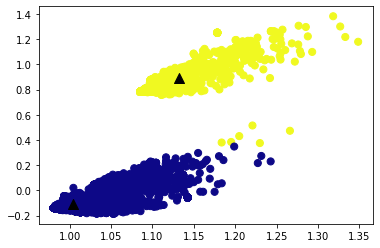

In [133]:
#Run k-means on the lower-dimension bow

k_svd=2
kmeans_svd = KMeans(n_clusters=k_svd)
predictions_svd = kmeans_svd.fit_predict(bow_svd)

plt.scatter(bow_svd[:, 0], bow_svd[:, 1], c=predictions_svd, s=50, cmap='plasma')

centers = kmeans_svd.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='k', marker='^', s=100)